# Three Observable Trends:

* Average fares are lower in Urban cities and higher in Rural Cities
* Majority of rides and drivers are in urban cities
* Cities with higher numbers of total rides have lower average fares





In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = '/Users/anikarahman/Desktop/Bootcamp_HW/HW5/city_data.csv'
ride_data_to_load = '/Users/anikarahman/Desktop/Bootcamp_HW/HW5/ride_data.csv'

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
datadf = pd.merge(ridedata, citydata,  how='inner', on='city')

# Display the data table for preview
datadf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [174]:

# Add titles (main and on axis)


## Bubble Plot of Ride Sharing Data

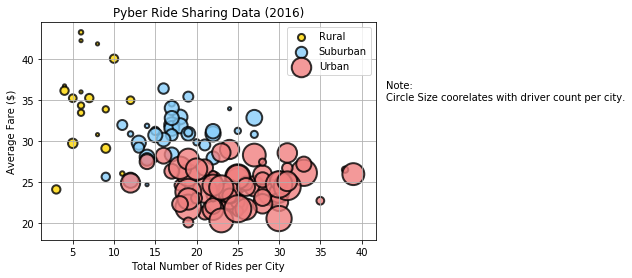

In [15]:
# Obtain the x and y coordinates for each of the three city types

ruraldata = datadf[datadf['type']=='Rural']
dpercity_r = ruraldata.groupby('city').mean()[['driver_count', 'fare']]
dpercity_r['total rides'] = ruraldata['city'].value_counts()

subdata = datadf[datadf['type']=='Suburban']
dpercity_s = subdata.groupby('city').mean()[['driver_count', 'fare']]
dpercity_s['total rides'] = subdata['city'].value_counts()

urbandata = datadf[datadf['type']=='Urban']
dpercity_u = urbandata.groupby('city').mean()[['driver_count', 'fare']]
dpercity_u['total rides'] = urbandata['city'].value_counts()

# Build the scatter plots for each city types

plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.scatter(dpercity_r['total rides'], dpercity_r['fare'], s=(dpercity_r['driver_count'])*10,  label = 'Rural', c='gold', alpha=0.8, edgecolors = 'k', linewidth=2)
plt.scatter(dpercity_s['total rides'], dpercity_s['fare'], s=(dpercity_s['driver_count'])*10,  label = 'Suburban', c='lightskyblue', alpha=0.8, edgecolors = 'k', linewidth=2)
plt.scatter(dpercity_u['total rides'], dpercity_u['fare'], s=(dpercity_u['driver_count'])*10,  label = 'Urban', c='lightcoral', alpha=0.8, edgecolors = 'k', linewidth=2)

# Incorporate the other graph properties

# Create a legend
plt.legend(loc="best")
plt.grid()
# Incorporate a text label regarding circle size
plt.text(43,35, f"Note: \nCircle Size coorelates with driver count per city.")
# Save Figure


plt.savefig("Pyber Ride Sharing Data 2016.png")
plt.show()

## Total Fares by City Type

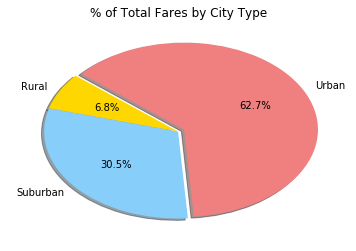

In [16]:
# Calculate Type Percents
faresbytype = datadf.groupby(["type"])["fare"].sum().rename("Total Fare")

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(faresbytype, explode=[0,0,.05], labels=['Rural', 'Suburban', 'Urban'], colors = ['gold', 'lightskyblue', 'lightcoral'],
        autopct="%1.1f%%", shadow=True, startangle=140)


# Save Figure
plt.savefig("Total Fares by City Type.png")
plt.show()

## Total Rides by City Type

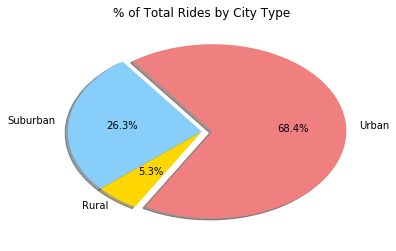

In [17]:
# Calculate Ride Percents
ridepercents = datadf['type'].value_counts()

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(ridepercents, explode=[.08,0,0], labels=['Urban', 'Suburban', 'Rural'], colors = ['lightcoral', 'lightskyblue', 'gold'],
        autopct="%1.1f%%", shadow=True, startangle=240)


# Save Figure
plt.savefig("Total Rides by City Type.png")
plt.show()

## Total Drivers by City Type

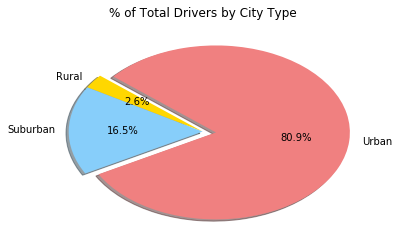

In [18]:
# Calculate Driver Percents

#ruraldata = datadf[datadf['type']=='Rural']
driver_r = (ruraldata.groupby('city').mean()['driver_count']).sum()

#subdata = datadf[datadf['type']=='Suburban']
driver_s = (subdata.groupby('city').mean()['driver_count']).sum()

#urbandata = datadf[datadf['type']=='Urban']
driver_u = (urbandata.groupby('city').mean()['driver_count']).sum()

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie([driver_r, driver_s, driver_u], explode=[0,0,.1], labels=['Rural', 'Suburban', 'Urban'], colors = ['gold', 'lightskyblue', 'lightcoral'],
        autopct="%1.1f%%", shadow=True, startangle=140)


# Save Figure
plt.savefig("Total Drivers by City Type.png")
plt.show()


